# Machine Learning - Linear Regression

# Summary
Machine Learning challenge in which, given a dataset, a linear regression predictive model is performed. 

We will make use of `statsmodles` library for model generation due to its great summary information

In [1]:
# Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Graphs config 
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

# Preproccess and modelling
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [2]:
# moving to root folder 
%cd ..

/home/manuel/NUWE/linear_regression


In [3]:
# Data to be used to train and to test/predict
# ==============================================================================
import os

folder = 'data'
file_train = 'j0001_train.csv'
file_test = 'j0001_X_test.csv'
path_train = os.path.join(folder, file_train)
path_test = os.path.join(folder, file_test)

data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

data_train.head(10)

,feature1,feature2,feature3,feature4,target
0,0.885598,-0.058136,-0.502394,-0.072880,4.999557
1,1.391696,0.350938,0.311445,-0.780685,56.613234
2,-0.599735,-0.072272,1.541158,-0.384914,43.374539
3,1.108150,1.924439,-0.068485,1.985521,50.226308
4,-0.724598,-1.485027,-1.755203,-0.254649,-107.187888
5,0.136546,-0.127270,-0.881028,-0.506504,-32.604402
6,0.295902,0.223827,0.140801,-0.845434,16.629503
7,-1.233292,-0.706870,0.473944,0.515332,-24.496265
8,2.292826,0.602614,0.222382,-0.317553,81.922767
9,-0.157721,-1.759156,-1.743006,0.529000,-93.217654


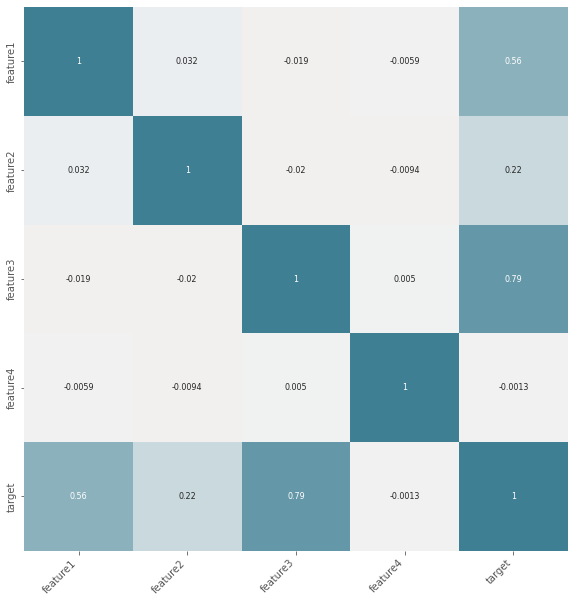

In [4]:
# Column correlation
# ==============================================================================
corr_matrix = data_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# Correlations Heatmap
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

According to this corr matrix, we can observe `feature4` has little correlation with target if any (and also with the rest) 

In [5]:
# Model generation
# ==============================================================================
X_train = data_train[['feature1', 'feature2', 'feature3', 'feature4']]
y_train = data_train['target']
# A 1s column has to be added to the predictors matrix for intercept
X_train = sm.add_constant(X_train, prepend=True)
model = sm.OLS(endog=y_train, exog=X_train,)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.021e+31
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:11:21   Log-Likelihood:                 58342.
No. Observations:                2100   AIC:                        -1.167e+05
Df Residuals:                    2095   BIC:                        -1.166e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.248e-14   4.55e-15    -20.326      0.0

According to the value of the obtained coeficient together with the nearly null correlation of predictor `feature4`, this variable is not contributing significantly to model. A new model is trained without `feature4`


In [6]:
X_train = X_train.drop(columns = 'feature4')
model_wo_feature4  = sm.OLS(endog=y_train, exog=X_train,)
model_wo_feature4  = model_wo_feature4.fit()
print(model_wo_feature4.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.831e+33
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:11:21   Log-Likelihood:                 62349.
No. Observations:                2100   AIC:                        -1.247e+05
Df Residuals:                    2096   BIC:                        -1.247e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.785e-15   6.75e-16    -13.019      0.0

for completeness we compare both models, with and without `feature4`, using an ANOVA test to ensure the ellimination of this feature does not lead to a worse prediction model

In [7]:
anova_lm(model_wo_feature4, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2096.0,2.002201e-24,0.0,NaN,NaN,NaN
1,2095.0,9.096618e-23,1.0,-8.896398e-23,-2048.888223,1.0


*p-value* es identically 1, so we cannot say the model with `feature4` to be able to make better predictions, hence for now on we choose the model without `feature4`

In [8]:
# Test error of model 
# ==============================================================================
fitted_y_train = model_wo_feature4.predict(exog = X_train)
rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = fitted_y_train,
        squared = False
       )
print("")
print(f"Test error (rmse) is: {rmse}")


Test error (rmse) is: 3.0877650157341176e-14


In [9]:
# Predictions
# ==============================================================================
X_test = data_test[['feature1', 'feature2', 'feature3']]
X_test = sm.add_constant(X_test, prepend=True)
predictions = model_wo_feature4.predict(exog = X_test)
predictions

0      49.768770
1     -26.097642
2      11.892201
3      32.167214
4     -35.973501
         ...    
895     9.006492
896   -52.778806
897     0.078914
898    41.491268
899    24.625784
Length: 900, dtype: float64

In [10]:
# Saving predictions
# ==============================================================================
results_folder = 'results'
results_file = 'results.csv'
predictions.to_csv(os.path.join(results_folder, results_file), header=False, index=False)